## collect data

In [1]:
import wandb
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

api = wandb.Api()
decisions = []
timers = []
conflicts = []
restarts = []
successes = []
allnames = []

runs = api.runs(
    'wouterbesse/sudoku-solver',
    {"$and": [ {"tags": '9'} ]},
)
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
i = 0
with tqdm(runs) as pbar:
    for run in pbar:
        pbar.set_description(run.name)
        try:
            
            curdecisions = run.history(samples=1000)["decisions"]
            decisions.extend(curdecisions)
            name: list[str] = [run.name] * len(curdecisions)
            allnames.extend(name)
            timers.extend(run.history(samples=1000)["time"])
            conflicts.extend(run.history(samples=1000)["conflicts"])
            restarts.extend(run.history(samples=1000)["restarts"])
            successes.extend(run.history(samples=1000)["success"])
            i += 1
        except:
            print(run.name, run.config)
            pass

            # dataPoolMaxFit.append(np.array(Maxfitnesses))
            # dataPoolMeanFit.append(np.array(Meanfitnesses))
            # dataPoolStdFit.append(np.array(Stdfitnesses))
            # dataPoolMaxGain.append(np.array(MaxGains))
            
mydata = pd.DataFrame({
    'names': allnames,
    'decisions': decisions,
    'time': timers,
    'conflicts': conflicts,
    'restarts': restarts,
    'successes': successes
})

mydata.to_csv('./9x9stats.csv', index=False)

  0%|          | 0/8 [00:00<?, ?it/s]

## create charts

C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df = sns.violinplot(data=mydata, x='names', y=i, inner='box', order=names.keys(), palette=colors, bw_adjust=0.1, gridsize= 1000, density_norm = 'width', common_norm=True)
C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df.set_xticklabels([names[name] for name in names.keys()])


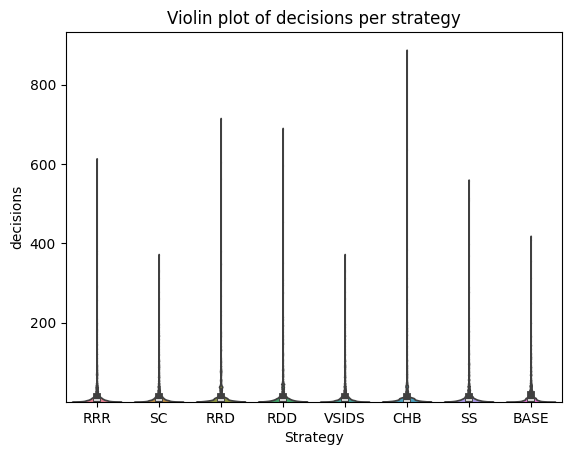

C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df = sns.violinplot(data=mydata, x='names', y=i, inner='box', order=names.keys(), palette=colors, bw_adjust=0.1, gridsize= 1000, density_norm = 'width', common_norm=True)
C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df.set_xticklabels([names[name] for name in names.keys()])


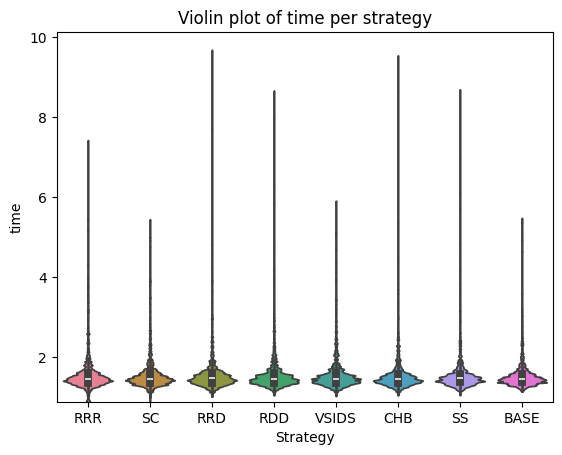

C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df = sns.violinplot(data=mydata, x='names', y=i, inner='box', order=names.keys(), palette=colors, bw_adjust=0.1, gridsize= 1000, density_norm = 'width', common_norm=True)
C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df.set_xticklabels([names[name] for name in names.keys()])


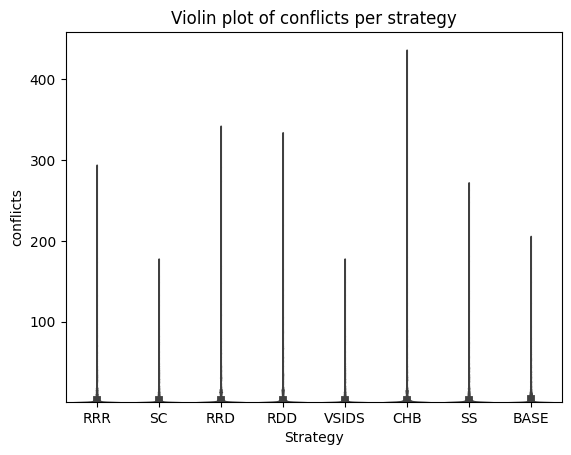

C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  df = sns.violinplot(data=mydata, x='names', y=i, inner='box', order=names.keys(), palette=colors, bw_adjust=0.1, gridsize= 1000, density_norm = 'width', common_norm=True)
C:\Users\woute\AppData\Local\Temp\ipykernel_37640\3682244341.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  df.set_xticklabels([names[name] for name in names.keys()])


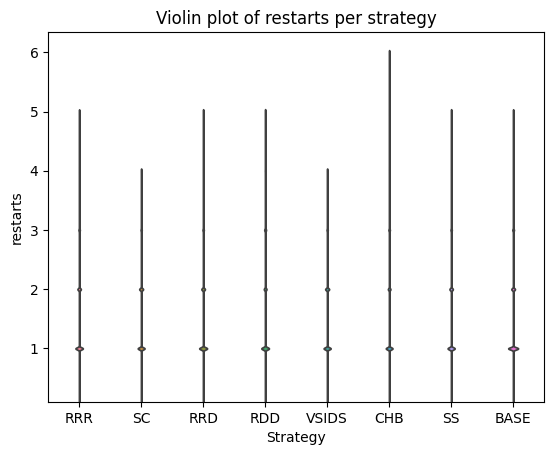

In [ ]:
import seaborn as sns

# create a violin plot for each measurement, in this violin plot all 8 algorithms are compared using seaborn
names = {"9x9robinre": 'RRR',
         '9x9snip': 'SC',
         "9x9rr": 'RRD',
         "9x9random": 'RDD',
         "9x9vsids": 'VSIDS',
         "9x9chb": 'CHB',
         "9x9sss": 'SS',
         "9x9ranran": 'BASE'}

colors = sns.color_palette("husl", 8)

for i in ['decisions', 'time', 'conflicts', 'restarts']:
    df = sns.violinplot(data=mydata, x='names', y=i, inner='box', order=names.keys(), palette=colors, bw_adjust=0.1, gridsize= 1000, density_norm = 'width', common_norm=True)
    df.set_xticklabels([names[name] for name in names.keys()])
    plt.title(f"Violin plot of {i} per strategy")
    plt.ylabel(i)
    minval = mydata[i].min()
    # set limits
    # if i == 'decisions':
    #     plt.ylim(1e-0)
    # elif i == 'time':
    #     plt.ylim(minval)
    # elif i == 'conflicts':
    #     plt.ylim(1e-0)
    # elif i == 'restarts':
    #     plt.ylim(1e-1)
    plt.xlabel('Strategy')
    plt.savefig(f'./{i}.png')
    plt.show()
    
    

    
# make a histogram of the time per strategy
# plt.figure(figsize=(10, 6))
# plt.title("Histogram of time per strategy")
# plt.hist([mydata[mydata.names == name]['time'] for name in names.keys()], bins=20, label=[names[name] for name in names.keys()])
# plt.ylabel('Frequency')
# plt.xlabel('Time')
# plt.legend()
# # plt.savefig('./timehist.png')
# plt.show()
    